# World of Warcraft Weapon Data Mining

In this humble project we will attmpt to mine the weapon data of WOW. 

There are three major types of weapons, which are:

- One-handed (melee)
- Two-handed (melee)
- Ranged 

In this time we will focus on two-handed weapons, as my class in WOW is warrior with the Arms Talent. I am only Lv26 currently, and am struggling with leveling up! I would like to investigate the best weapon at each level for arms warrior.

An arms warrior favors one attribute, which is, the Damage Per Hit (DPH). The larger the DPH of a weapon, the better it is for me. Therefore, this project aims to figure out the ranks of two-handed weapons per level, under the measured of DPH.

Let's get to start.

First of all, we have to import all the necessary libraries, and set them with some good parameters.

In [67]:
# Basic Libraries
# %pylab inline  # Keep the plot inline
import numpy as np  # For scientific computation
import pandas as pd # For dataframe operation
import matplotlib.pyplot as plt # For visualization
import seaborn as sb # For visualization
from sklearn.linear_model import RANSACRegressor, LinearRegression # For fitting the linear model

sb.set() # set the default Seaborn style for graphics
pd.set_option('display.max_columns', None) # Disable the limits on the preview
pd.set_option('display.max_rows', None)
sb.set(font_scale = 1.3) # Large font is friendly to your eye

### Data Cleaning

We have two csv files to deal with, all_weapon.csv and all_weapon_supp.csv. We start by previewing the first file, and amend some of the column name to a better shape.

In [68]:
rawData1 = pd.read_csv('all_weapon.csv')
rawData1.head()
rawData1.rename(columns={'|': 'itemid', '|__name_enus': 'name',  
                        '|__quality': 'quality', '|__icon': 'icon', 
                        '|__screenshot': 'screenshot', '|__jsonequip__cooldown': 'cooldown', 
                        '|__jsonequip__arcres': 'arcres', '|__jsonequip__armor': 'armor', 
                        '|__jsonequip__agi': 'agi', '|__jsonequip__atkpwr': 'atkpwr', 
                        '|__jsonequip__avgbuyout': 'avgbuyout', '|__jsonequip__buyprice': 'buyprice', 
                        '|__jsonequip__def': 'def', '|__jsonequip__classes': 'classes', 
                        '|__jsonequip__displayid': 'displayid', '|__jsonequip__dmgmax1': 'dmgmax1', 
                        '|__jsonequip__dmgmin1': 'dmgmin1', '|__jsonequip__dmgrange': 'dmgrange', 
                        '|__jsonequip__dmgtype1': 'dmgtype1', '|__jsonequip__dps': 'dps', 
                        '|__jsonequip__dura': 'dura', '|__jsonequip__manargn': 'manargn', 
                        '|__jsonequip__healthrgn': 'healthrgn', '|__jsonequip__int': 'int', 
                        '|__jsonequip__firres': 'firres', '|__jsonequip__frores': 'frores', 
                        '|__jsonequip__holsplpwr': 'holsplpwr', '|__jsonequip__maxcount': 'maxcount',
                        '|__jsonequip__mlecritstrkpct': 'mlecritstrkpct', '|__jsonequip__mledmgmax': 'mledmgmax',
                        '|__jsonequip__mledmgmin': 'mledmgmin', '|__jsonequip__mledps': 'mledps',
                        '|__jsonequip__mlehitpct': 'mlehitpct', '|__jsonequip__mlespeed': 'mlespeed',
                        '|__jsonequip__races': 'races', '|__jsonequip__reqskill': 'reqskill',
                        '|__jsonequip__reqskillrank': 'reqskillrank', '|__jsonequip__natres': 'natres',
                        '|__jsonequip__parrypct': 'parrypct', '|__jsonequip__reqlevel': 'reqlevel',
                        '|__jsonequip__rgdcritstrkpct': 'rgdcritstrkpct', '|__jsonequip__rgdhitpct': 'rgdhitpct',
                        '|__jsonequip__sellprice': 'sellprice', '|__jsonequip__shares': 'shares',
                        '|__jsonequip__sheathtype': 'sheathtype', 
                        '|__jsonequip__slotbak': 'slotbak', '|__jsonequip__speed': 'speed', 
                        '|__jsonequip__splcritstrkpct': 'splcritstrkpct', '|__jsonequip__splpwr': 'splpwr', 
                        '|__jsonequip__spi': 'spi', '|__jsonequip__splheal': 'splheal', 
                        '|__jsonequip__sta': 'sta', '|__jsonequip__str': 'str', 
                        '|__attainable': 'attainable', '|__flags2': 'flags2',
                         '|__jsonequip__arcsplpwr': 'arcsplpwr', '|__jsonequip__feratkpwr': 'feratkpwr',
                         '|__jsonequip__firsplpwr': 'firsplpwr', '|__jsonequip__itemset': 'itemset',
                         '|__jsonequip__frosplpwr': 'frosplpwr', '|__jsonequip__natsplpwr': 'natsplpwr',
                         '|__jsonequip__reqfaction': 'reqfaction', '|__jsonequip__shasplpwr': 'shasplpwr',
                         '|__jsonequip__splpen': 'splpen', '|__jsonequip__splhitpct':'splhitpct', 
                       }, inplace=True)
rawData1.head()

,itemid,name,quality,icon,screenshot,arcsplpwr,arcres,armor,def,buyprice,atkpwr,agi,classes,cooldown,avgbuyout,displayid,dmgmax1,dmgmin1,dmgrange,dmgtype1,dps,dura,feratkpwr,healthrgn,firsplpwr,itemset,firres,frores,holsplpwr,frosplpwr,int,manargn,maxcount,mlecritstrkpct,mledmgmax,mledmgmin,mledps,mlehitpct,mlespeed,natsplpwr,races,reqskill,reqskillrank,parrypct,natres,reqfaction,reqlevel,|__jsonequip__rgdatkpwr,|__jsonequip__reqrep,rgdcritstrkpct,|__jsonequip__rgddmgmax,|__jsonequip__rgddmgmin,|__jsonequip__rgddps,|__jsonequip__rgdspeed,rgdhitpct,sellprice,shasplpwr,shares,sheathtype,slotbak,speed,splpen,splcritstrkpct,splhitpct,str,spi,splheal,sta,splpwr,attainable,flags2
0,17780,Blade of Eternal Darkness,4,inv_sword_09,58411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29957,69.499998,33.500001,1,0.0,34.33,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,69.499998,33.500001,34.33,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46796.0,NaN,NaN,3.0,21.0,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,8192
1,5040,Shadow Hunter Knife,1,inv_weapon_shortblade_11,73285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20321,35.000000,18.000000,1,0.0,15.59,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,18.000000,15.59,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,13.0,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,8192
2,2164,Gut Ripper,4,inv_sword_13,2432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350000.0,20312,80.000000,42.000000,1,0.0,33.89,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,42.000000,33.89,NaN,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27031.0,NaN,NaN,3.0,13.0,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,8192
3,13964,Witchblade,3,inv_weapon_shortblade_25,131593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24775,85.000000,45.000000,1,0.0,40.63,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,85.000000,45.000000,40.63,NaN,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53612.0,NaN,NaN,3.0,13.0,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0,8192
4,7714,Hypnotic Blade,3,inv_weapon_shortblade_07,155072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20318,49.000000,26.000000,1,0.0,26.79,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,49.000000,26.000000,26.79,NaN,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3835.0,NaN,NaN,3.0,13.0,1.4,NaN,NaN,NaN,NaN,3.0,NaN,NaN,9.0,0,8192


In [69]:
rawData2 = pd.read_csv('all_weapon_supp.csv')
rawData2.head()

,armor,classs,commondrop,displayid,dps,flags2,id,level,name,reqclass,reqlevel,reqrace,side,slot,slotbak,source__001,source__002,sourcemore__bd,sourcemore__c,sourcemore__c2,sourcemore__icon,sourcemore__dd,sourcemore__n,sourcemore__s,sourcemore__t,sourcemore__ti,sourcemore__z,speed,subclass,firstseenpatch,popularity,contentPhase
0,NaN,2,NaN,29957.0,34.33,8192,17780,54,4Blade of Eternal Darkness,NaN,49.0,NaN,NaN,21,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,15,0,8781,1.0
1,NaN,2,NaN,20321.0,15.59,8192,5040,32,7Shadow Hunter Knife,NaN,27.0,NaN,NaN,13,13.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Witherbark Shadow Hunter,NaN,1.0,2557.0,45.0,1.7,15,0,5460,1.0
2,NaN,2,NaN,20312.0,33.89,8192,2164,45,4Gut Ripper,NaN,40.0,NaN,NaN,13,13.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.0,Sandfury Shadowcaster,NaN,1.0,5648.0,1176.0,1.8,15,0,4558,1.0
3,NaN,2,NaN,24775.0,40.63,8192,13964,62,5Witchblade,NaN,57.0,NaN,NaN,13,13.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.0,Darkmaster Gandling,NaN,1.0,1853.0,2057.0,1.6,15,0,4331,1.0
4,NaN,2,NaN,20318.0,26.79,8192,7714,39,5Hypnotic Blade,NaN,34.0,NaN,NaN,13,13.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.0,Arcanist Doan,NaN,1.0,6487.0,796.0,1.4,15,0,4300,1.0


We then combine the two dataframe. All the rest analysis will be base on weaponData.

In [70]:
# We only select meaningful column from the raw dataframe.
weaponData1 = pd.DataFrame(rawData1[['name', 'quality', 'dps', 'speed', 'rgdcritstrkpct','rgdhitpct', 'atkpwr', 'str', 'agi']])
weaponData1.head()

weaponData2 = pd.DataFrame(rawData2[['level', 'reqclass', 'reqlevel', 'subclass']])
weaponData2.head()
# 'level', 'reqclass', 'reqlevel'

# Combine the two dataframe.
weaponData = weaponData1.join(weaponData2)
weaponData.rename(columns={'rgdcritstrkpct':'critstrkpct', 'rgdhitpct':'hitpct', 'subclass':'type'}, inplace=True)
weaponData.head(100)

,name,quality,dps,speed,critstrkpct,hitpct,atkpwr,str,agi,level,reqclass,reqlevel,type
0,Blade of Eternal Darkness,4,34.33,1.5,NaN,NaN,NaN,NaN,NaN,54,NaN,49.0,15
1,Shadow Hunter Knife,1,15.59,1.7,NaN,NaN,NaN,NaN,NaN,32,NaN,27.0,15
2,Gut Ripper,4,33.89,1.8,NaN,NaN,NaN,NaN,NaN,45,NaN,40.0,15
3,Witchblade,3,40.63,1.6,NaN,NaN,NaN,NaN,NaN,62,NaN,57.0,15
4,Hypnotic Blade,3,26.79,1.4,NaN,NaN,NaN,NaN,NaN,39,NaN,34.0,15
5,Assassin's Blade,3,15.53,1.9,NaN,NaN,NaN,3.0,4.0,24,NaN,19.0,15
6,Heartseeker,3,41.47,1.7,1.0,NaN,NaN,4.0,NaN,63,NaN,58.0,15
7,Felstriker,4,45.59,1.7,NaN,NaN,NaN,NaN,NaN,63,NaN,58.0,15
8,Alcor's Sunrazor,4,45.38,1.3,NaN,NaN,NaN,NaN,NaN,63,NaN,58.0,15
9,Torturing Poker,3,17.65,1.7,NaN,NaN,NaN,NaN,NaN,34,NaN,29.0,15


Lets overview the data. We find that there are 1765 weapons included. Lots of entries are Not a Number (NaN). 
We must solve this problem.

In [71]:
weaponData.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 13 columns):
name           1765 non-null object
quality        1765 non-null int64
dps            1764 non-null float64
speed          1764 non-null float64
critstrkpct    75 non-null float64
hitpct         27 non-null float64
atkpwr         87 non-null float64
str            287 non-null float64
agi            187 non-null float64
level          1765 non-null int64
reqclass       57 non-null float64
reqlevel       1667 non-null float64
type           1765 non-null int64
dtypes: float64(9), int64(3), object(1)
memory usage: 179.4+ KB


In [72]:
weaponData = weaponData.fillna(0) # Fill all the NaN by 0
weaponData.head()   # Now it looks good

,name,quality,dps,speed,critstrkpct,hitpct,atkpwr,str,agi,level,reqclass,reqlevel,type
0,Blade of Eternal Darkness,4,34.33,1.5,0.0,0.0,0.0,0.0,0.0,54,0.0,49.0,15
1,Shadow Hunter Knife,1,15.59,1.7,0.0,0.0,0.0,0.0,0.0,32,0.0,27.0,15
2,Gut Ripper,4,33.89,1.8,0.0,0.0,0.0,0.0,0.0,45,0.0,40.0,15
3,Witchblade,3,40.63,1.6,0.0,0.0,0.0,0.0,0.0,62,0.0,57.0,15
4,Hypnotic Blade,3,26.79,1.4,0.0,0.0,0.0,0.0,0.0,39,0.0,34.0,15


In [73]:
weaponData[['reqclass','reqlevel']] = weaponData[['reqclass','reqlevel']].astype(int) # Set some columns to integer
weaponData.head()

,name,quality,dps,speed,critstrkpct,hitpct,atkpwr,str,agi,level,reqclass,reqlevel,type
0,Blade of Eternal Darkness,4,34.33,1.5,0.0,0.0,0.0,0.0,0.0,54,0,49,15
1,Shadow Hunter Knife,1,15.59,1.7,0.0,0.0,0.0,0.0,0.0,32,0,27,15
2,Gut Ripper,4,33.89,1.8,0.0,0.0,0.0,0.0,0.0,45,0,40,15
3,Witchblade,3,40.63,1.6,0.0,0.0,0.0,0.0,0.0,62,0,57,15
4,Hypnotic Blade,3,26.79,1.4,0.0,0.0,0.0,0.0,0.0,39,0,34,15


In order to conveniently show the legend for future plotting, we create a new column to store the type name of each weapon.

In [74]:
weaponData['typename'] = weaponData['type'].map(
    {1:'Two-handed Axe',
     5:'Two-handed Mace',
     6:'Polearm',
     8:'Two-handed Sword',
     15:'Dagger',
     13:'Fist Weapon',
     0: 'One-handed Axe',
     4: 'One-handed Mace',
     7: 'One-handed Swords',
     10: 'Stave',
     2: 'Bow',
     18: 'Crossbow',
     3: 'Gun',
     16: 'Thrown',
     19: 'Wand',
     20: 'Fishing Pole',
     14: 'Miscellaneous'
     })
weaponData.head()

,name,quality,dps,speed,critstrkpct,hitpct,atkpwr,str,agi,level,reqclass,reqlevel,type,typename
0,Blade of Eternal Darkness,4,34.33,1.5,0.0,0.0,0.0,0.0,0.0,54,0,49,15,Dagger
1,Shadow Hunter Knife,1,15.59,1.7,0.0,0.0,0.0,0.0,0.0,32,0,27,15,Dagger
2,Gut Ripper,4,33.89,1.8,0.0,0.0,0.0,0.0,0.0,45,0,40,15,Dagger
3,Witchblade,3,40.63,1.6,0.0,0.0,0.0,0.0,0.0,62,0,57,15,Dagger
4,Hypnotic Blade,3,26.79,1.4,0.0,0.0,0.0,0.0,0.0,39,0,34,15,Dagger


DPH is calculated by speed times dps. We calculate it and insert to the dataframe.

In [75]:
dph = weaponData.speed * weaponData.dps
weaponData.insert(loc=8, column='dph', value=dph)
weaponData.head()

,name,quality,dps,speed,critstrkpct,hitpct,atkpwr,str,dph,agi,level,reqclass,reqlevel,type,typename
0,Blade of Eternal Darkness,4,34.33,1.5,0.0,0.0,0.0,0.0,51.495,0.0,54,0,49,15,Dagger
1,Shadow Hunter Knife,1,15.59,1.7,0.0,0.0,0.0,0.0,26.503,0.0,32,0,27,15,Dagger
2,Gut Ripper,4,33.89,1.8,0.0,0.0,0.0,0.0,61.002,0.0,45,0,40,15,Dagger
3,Witchblade,3,40.63,1.6,0.0,0.0,0.0,0.0,65.008,0.0,62,0,57,15,Dagger
4,Hypnotic Blade,3,26.79,1.4,0.0,0.0,0.0,0.0,37.506,0.0,39,0,34,15,Dagger


Some of the weapons have no reqlevel (required character level), and have been filled to 0 by previous operation. This may produce an very large dps or dph at reqlevel = 0. Therefore, we have to carefully assign the reqlevel attribute according to some prior knowledge, which are:

- if the level attribute is less than or equal to 5, then we set them to 1;
- if the level attribute is greater than or equal to 66, then we set them to 60;
- otherwise set them to level - 5.

In [76]:
weaponData = weaponData.drop(weaponData[weaponData['reqclass']>1].index)
weaponData = weaponData.query('type== ["1", "5", "6", "8"]')
for index, row in weaponData.iterrows():
    if row['reqlevel'] == 0:
        if row['level'] <= 5:
            weaponData.at[index,'reqlevel'] = 1
        elif row['level'] >= 66:
            weaponData.at[index,'reqlevel'] = 60
        else:
            tmp = row['level'] - 5
            weaponData.at[index,'reqlevel'] = tmp
                        
        

We have done the data cleaning. Hopefully our dataframe is in a good shape now.

### Exploratory Data Analysis
We start the EDA at our dataframe.

First, we would like to know the count for:

- Two-handed Mace
- Two-handed Sword
- Polearm
- Two-handed Axe


Number of Types : 4
5    128
8    126
1    119
6     44
Name: type, dtype: int64


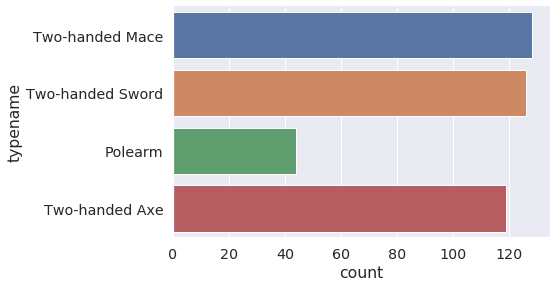

In [77]:
# Types in the Dataset
print("Number of Types :", len(weaponData["type"].unique()))

# Two-handed weapons in each type
print(weaponData["type"].value_counts())
sb.catplot(y = "typename", data = weaponData, kind = "count", height=4, aspect=2)

Next, we would like to know the cumulative distribution of of the selected weapon type, as well as the reqlevel to dps and reqlevel to dph relationships.

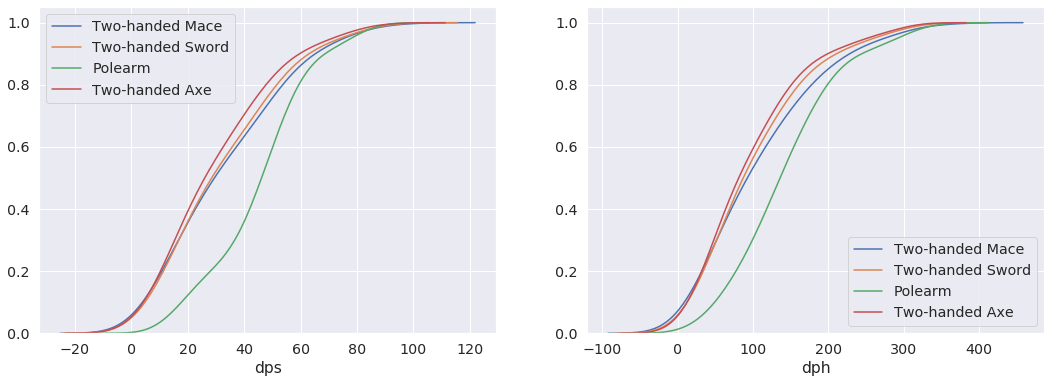

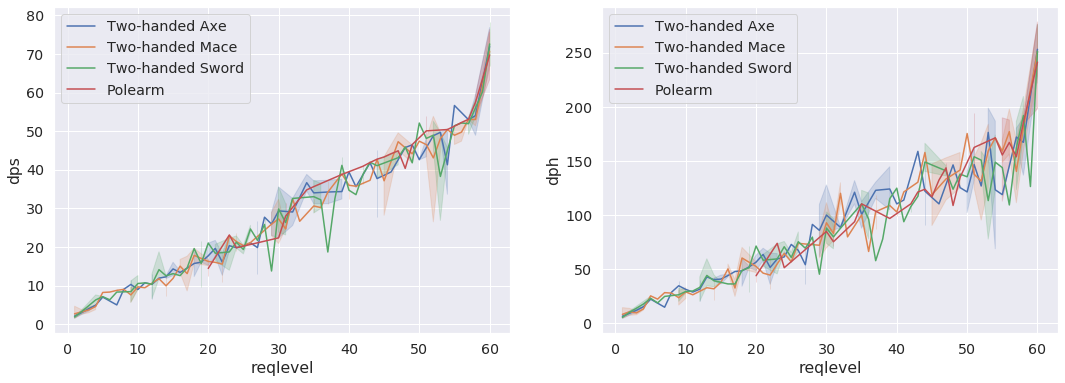

In [78]:
fig, axis = plt.subplots(1, 2, figsize=(18, 6))
uniqueVals = weaponData["typename"].unique()
types = [weaponData[weaponData["typename"]== val] for val in uniqueVals]

for i, t in enumerate(['dps', 'dph']):
    for idx, weaponType in enumerate(types):
        sb.distplot(weaponType[t], ax=axis[i % 2], hist=False, kde_kws=dict(cumulative=True), label=uniqueVals[idx])
        

weaponDataByLevel = weaponData.sort_values('reqlevel')

fig, axis = plt.subplots(1, 2, figsize=(18, 6))
uniqueVals = weaponDataByLevel["typename"].unique()
types = [weaponDataByLevel[weaponDataByLevel["typename"]== val] for val in uniqueVals]

for i, t in enumerate(['dps', 'dph']):
    for idx, weaponType in enumerate(types):
        sb.lineplot(x=weaponType['reqlevel'], y=weaponType[t], data=weaponType, ax=axis[i % 2], label=uniqueVals[idx])


We can see that Polearm has the least Area Under Curve (AUC). Does this mean that it is a bad choice to use Polearm? 

Definitely no. The AUC is small because there are only 44 weapons in Polearm category.

And for the reqlevel to dps and reqlevel to dph relationships, they are all saw-like. It is not a good idea to do the fitting on this stage. We choice to filter the data by weapon quality.

There are six quality degree in WOW, which are:

- 0: poor
- 1: common
- 2: uncommon
- 3: rare
- 4: epic
- 5: legendary

A humble warrior like me may be a lone wolf, but a wapon at rare quality can still be a reasonable goal. Also, some time we should own our dreams, right? Therefore, we only consider rare and epic weapons.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 465 to 1317
Data columns (total 15 columns):
name           190 non-null object
quality        190 non-null int64
dps            190 non-null float64
speed          190 non-null float64
critstrkpct    190 non-null float64
hitpct         190 non-null float64
atkpwr         190 non-null float64
str            190 non-null float64
dph            190 non-null float64
agi            190 non-null float64
level          190 non-null int64
reqclass       190 non-null int64
reqlevel       190 non-null int64
type           190 non-null int64
typename       190 non-null object
dtypes: float64(8), int64(5), object(2)
memory usage: 23.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 1247 to 1317
Data columns (total 15 columns):
name           190 non-null object
quality        190 non-null int64
dps            190 non-null float64
speed          190 non-null float64
critstrkpct    190 non-null float64
hitpct         

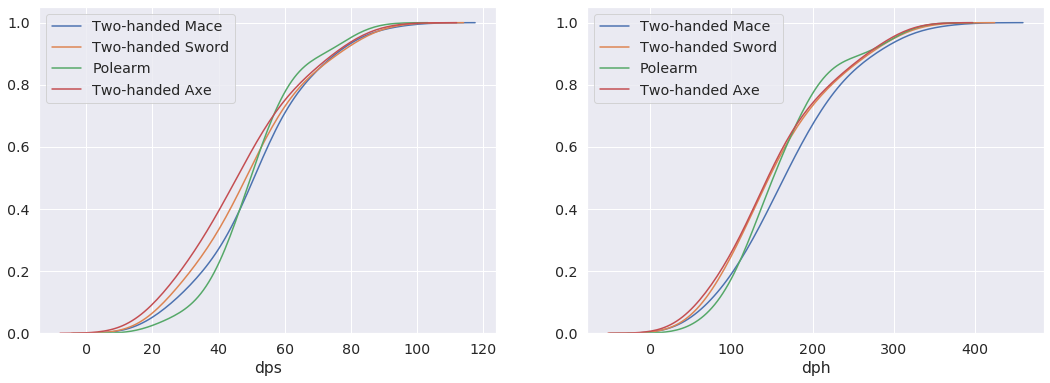

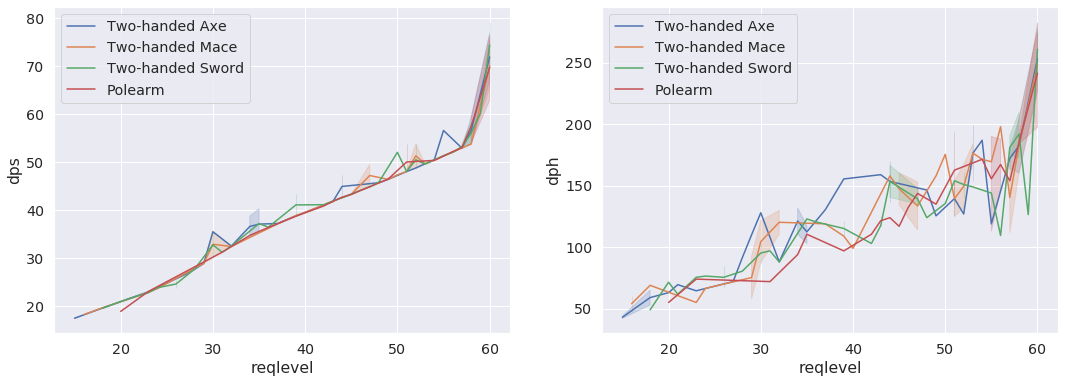

In [79]:
rareWeaponData = weaponData.query('quality== ["3", "4"]')
rareWeaponData.info()

fig, axis = plt.subplots(1, 2, figsize=(18, 6))
uniqueVals = rareWeaponData["typename"].unique()
types = [rareWeaponData[rareWeaponData["typename"]== val] for val in uniqueVals]

for i, t in enumerate(['dps', 'dph']):
    for idx, WeaponData in enumerate(types):
        sb.distplot(WeaponData[t], ax=axis[i % 2], hist=False, kde_kws=dict(cumulative=True), label=uniqueVals[idx])

rareWeaponDataByLevel = rareWeaponData.sort_values('reqlevel')
rareWeaponDataByLevel.info()
fig, axis = plt.subplots(1, 2, figsize=(18, 6))
uniqueVals = rareWeaponDataByLevel["typename"].unique()
types = [rareWeaponDataByLevel[rareWeaponDataByLevel["typename"]== val] for val in uniqueVals]

for i, t in enumerate(['dps', 'dph']):
    for idx, weaponType in enumerate(types):
        sb.lineplot(x=weaponType['reqlevel'], y=weaponType[t], data=weaponType, ax=axis[i % 2], label=uniqueVals[idx],alpha=1)

After filtering the data, we have a very nice reqlevel to dps relationship, and a even chaos reqlevel to dph one. This is reasonable. According to the prior knowledge from Blizzard, who designed WOW, the dps and character level are always in a linear relationship, which is now shown as lines in the bottom-left figure above. However, the speed of weapon may greatly varied, thats why the two bottom figures above are in such sharp contrast.

We choose to fit dps to reqlevel, and use the coefficient to extrapolate the dph-reqlevel relationship.

We use common least square regression and Random Sampling Consensus (RANSAC) to fit the data, and choose the better one for determining the extrapolation.

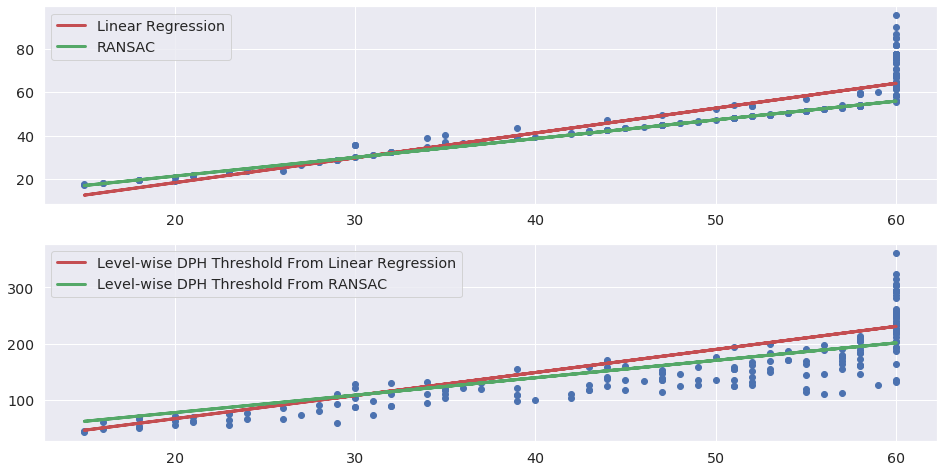

In [80]:
X = rareWeaponData[['reqlevel']]
linreg = LinearRegression()
ranreg = RANSACRegressor(LinearRegression(), max_trials = 1000, stop_probability = 0.9999, residual_threshold=1)
baseSpeed = 3.6
f, axes = plt.subplots(2, 1, figsize=(16, 8))

Y = rareWeaponData[['dps']]
linreg.fit(X, Y)
ranreg.fit(X, Y)

reglineX = X
reglineY = linreg.intercept_ + linreg.coef_ * X
reglineYRansac = ranreg.estimator_.intercept_ + ranreg.estimator_.coef_ * X

axes[0].scatter(X, Y)
axes[0].plot(reglineX, reglineY, 'r-', linewidth = 3)
axes[0].plot(reglineX, reglineYRansac, 'g-', linewidth = 3)
axes[0].legend(['Linear Regression', 'RANSAC'], loc="best")

reglinePredFromRegDps = baseSpeed * reglineY
reglinePredFromRansacDps = baseSpeed * reglineYRansac


Y = rareWeaponData[['dph']]
axes[1].scatter(X, Y)
axes[1].plot(reglineX, reglinePredFromRegDps, 'r-', linewidth = 3)  
axes[1].plot(reglineX, reglinePredFromRansacDps, 'g-', linewidth = 3)  
axes[1].legend(['Level-wise DPH Threshold From Linear Regression', 'Level-wise DPH Threshold From RANSAC'], loc="best")


For upper figure, We see that the least square regression (red line) is skewed by the data points from lvel 60, which refere to the powerful weapons with extremely powerful DPS. In contrast, RANSAC (green line) perfectly capture the linear relationship without being skewed.

For lower figure, the two lines are drawn using the parameters from dps. The skew of red line is even more terrible, whereas the green line produces reasonable result. I say it is reasonable because for reqlevel = 51, the highest data point corresponds to the Ice Barbed Spear, a very nice weapon which can be acquired at level 51 yet has nearly the same dpsa at level 60. Accordingly, when reqlevel = 60, the highest data point at reqlevel = 51 has almost the same height with the green line.

Nest we will calculate the level superior for each weapon. Good weapons will have positive number, while bad weapons will have negative number.

We only consider those with positive level superior. We also exclude the weapons at reqlevel 60, which suit players riching in time or money.

In [81]:
keys = list(range(1,61))
values = (ranreg.estimator_.intercept_ + ranreg.estimator_.coef_[0] * keys) * baseSpeed
Benchmark = dict(zip(keys, values))
print(Benchmark)

rareWeaponData.loc[:,'baseDPH'] = rareWeaponData.loc[:,'reqlevel'].map(Benchmark)
rareWeaponData.loc[:, 'diffDPH'] = rareWeaponData.loc[:, 'dph'] - rareWeaponData.loc[:,'baseDPH']
rareWeaponData.loc[:, 'levelsup'] = ((rareWeaponData.loc[:, 'diffDPH'] / baseSpeed))/ ranreg.estimator_.coef_[0]
print(ranreg.estimator_.coef_, ranreg.estimator_.intercept_)
sortedWeaponData = rareWeaponData.sort_values(['reqlevel', 'levelsup'], ascending=[True, False])

sortedWeaponData.head(1000)
mask1 = sortedWeaponData.loc[:,'levelsup'] > 0 # Only consider good weapon having positive level superior
mask2 = sortedWeaponData.loc[:,'reqlevel'] < 60 # Only consider weapons for level 1-59
mask = mask1 & mask2
sortedWeaponData = sortedWeaponData[mask]
sortedWeaponData.head()

occur = sortedWeaponData.groupby('reqlevel').cumcount()
sortedWeaponData.insert(loc=16, column='occur', value=occur)
sortedWeaponData.head()

{1: 18.18415858949406, 2: 21.285780151472327, 3: 24.387401713450593, 4: 27.48902327542886, 5: 30.590644837407126, 6: 33.69226639938539, 7: 36.79388796136366, 8: 39.89550952334192, 9: 42.99713108532019, 10: 46.098752647298454, 11: 49.200374209276724, 12: 52.30199577125499, 13: 55.40361733323326, 14: 58.50523889521152, 15: 61.606860457189796, 16: 64.70848201916806, 17: 67.81010358114632, 18: 70.91172514312458, 19: 74.01334670510286, 20: 77.11496826708112, 21: 80.21658982905939, 22: 83.31821139103765, 23: 86.41983295301593, 24: 89.52145451499419, 25: 92.62307607697245, 26: 95.72469763895072, 27: 98.82631920092899, 28: 101.92794076290726, 29: 105.02956232488552, 30: 108.13118388686378, 31: 111.23280544884206, 32: 114.33442701082032, 33: 117.43604857279858, 34: 120.53767013477683, 35: 123.63929169675512, 36: 126.74091325873339, 37: 129.84253482071165, 38: 132.94415638268993, 39: 136.0457779446682, 40: 139.14739950664645, 41: 142.2490210686247, 42: 145.35064263060298, 43: 148.45226419258125,

/home/su/anaconda3/envs/wow/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/su/anaconda3/envs/wow/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,name,quality,dps,speed,critstrkpct,hitpct,atkpwr,str,dph,agi,level,reqclass,reqlevel,type,typename,baseDPH,occur,diffDPH,levelsup
1233,Corpsemaker,3,28.95,3.8,0.0,0.0,0.0,15.0,110.010,0.0,34,0,29,1,Two-handed Axe,105.029562,0,4.980438,1.605753
1230,Whirlwind Axe,3,35.56,3.6,0.0,0.0,0.0,15.0,128.016,0.0,40,1,30,1,Two-handed Axe,108.131184,0,19.884816,6.411103
467,Whirlwind Warhammer,3,35.74,3.4,0.0,0.0,0.0,15.0,121.516,0.0,40,1,30,5,Two-handed Mace,108.131184,1,13.384816,4.315425
475,The Pacifier,3,32.50,4.0,0.0,0.0,0.0,18.0,130.000,0.0,37,0,32,5,Two-handed Mace,114.334427,0,15.665573,5.050769
1234,Bonebiter,3,38.82,3.4,0.0,0.0,0.0,20.0,131.988,0.0,44,0,34,1,Two-handed Axe,120.537670,0,11.450330,3.691724


Almost done! The last thing we want to do, is the Data Visualization.

# Data Visualization

We choose to use the stacked bar plot to shown the ranks, with the index fixed at each segment of the bar.
The legend will show the exact name of each weapon associated with the index, alone with the level superior.

Text(0.5, 1.0, 'Top Two-handed Weapons by Damage Per Hit')

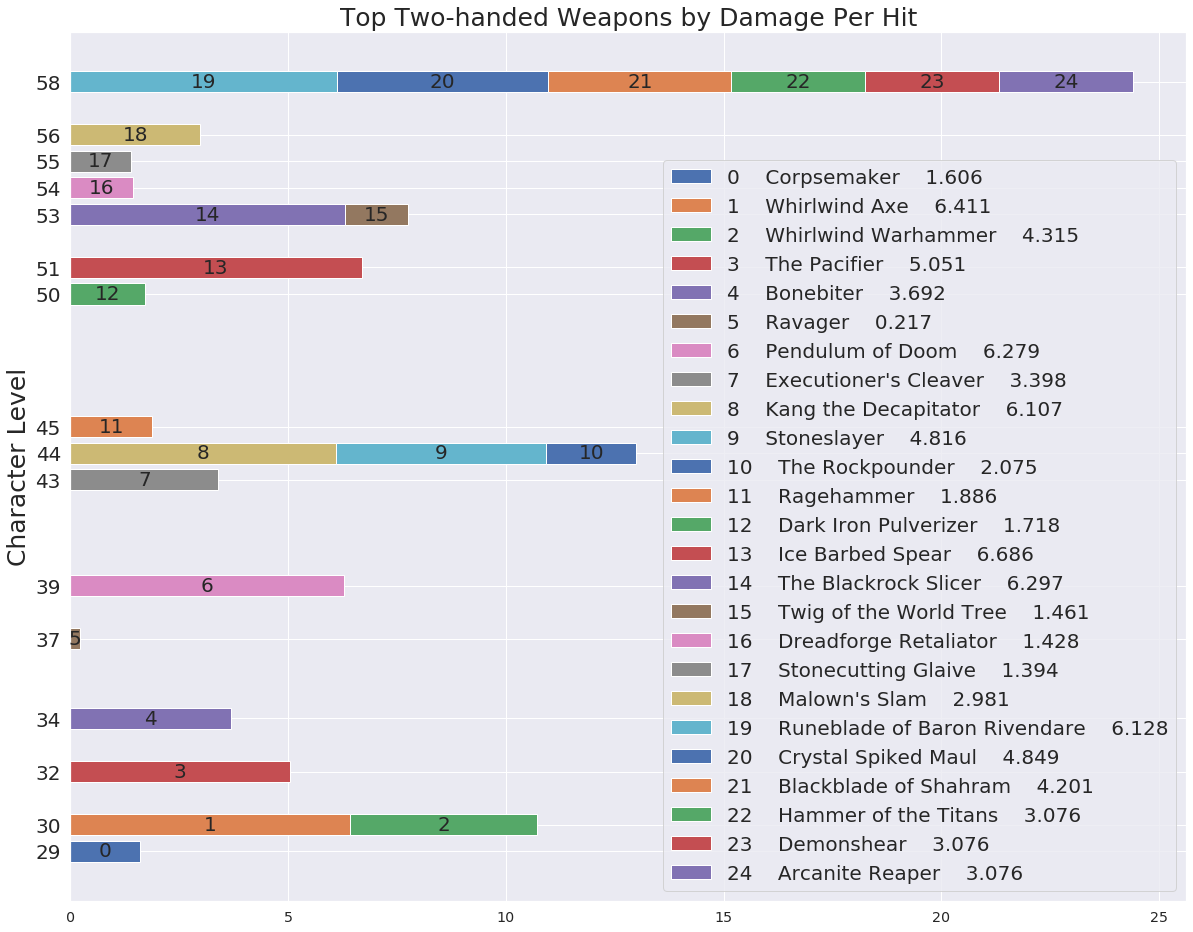

In [82]:
resultByLevelsup = pd.pivot_table(sortedWeaponData, index = ['reqlevel', 'occur'], values="levelsup")
resultByName = pd.pivot_table(sortedWeaponData, index = ['reqlevel', 'occur'], values="name",aggfunc='first')

result = pd.concat([resultByLevelsup, resultByName], axis=1).reset_index()
result.head(100)

reqlevelUnique = len(result['reqlevel'].unique())
qualifiedWeaponNumber = len(result.index)


rows = result['reqlevel']
widths = result['levelsup']
labels = result['name']
row_counts = np.arange(0, qualifiedWeaponNumber)
left = np.zeros(reqlevelUnique,)
idx = np.arange(0,qualifiedWeaponNumber)
pointer = 0
patch_handles = []

for (level, i) in zip(result['reqlevel'], idx):
    if i>0:
        if result['reqlevel'].loc[i]!= result['reqlevel'].loc[i-1]:
            pointer+=1
    idx[i] = pointer


fig, ax = plt.subplots(1, 1, figsize=(20, 16))
for (r, w, l, i, j) in zip(rows, widths, labels, idx, row_counts):
    dif = ('%.3f' % w)
    label = (str(j) + '    ' + l + '    ' + str(dif))
    patch_handles.append(ax.barh(r, w, align='center', left=left[i], label=label))

    left[i] += w
    patch = patch_handles[-1][0] 
    bl = patch.get_xy()
    x = 0.5*patch.get_width() + bl[0]
    y = 0.5*patch.get_height() + bl[1]
    ax.text(x, y, "%s" % (j), ha='center',va='center',size = 20)
    
y_pos = result['reqlevel'].unique()
ax.set_yticks(y_pos)
ax.tick_params(axis='y', labelsize=20)
ax.legend(loc = 'best',prop={'size':20})
ax.set_ylabel('Character Level', fontsize=25)
ax.set_title('Top Two-handed Weapons by Damage Per Hit', fontsize=25)

Finally we obtain the result! 

There are 25 weapons that have positive level superior on my leveling path. I should pay more attention to them!